In [1]:
%%shell
jupyter nbconvert --to html /content/Noah_Schapera_Module_5_Part_II.ipynb

[NbConvertApp] Converting notebook /content/Noah_Schapera_Module_5_Part_II.ipynb to html
[NbConvertApp] Writing 867332 bytes to /content/Noah_Schapera_Module_5_Part_II.html


**This is the second half of the module 5 assignment. The full module 5 assignment will be due on Wednesday, April 6 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas.** 

In [ ]:
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt

**We discussed 1 and 2 dimensional random walks in class last week. In this assignment, you'll explore the behavior of particles and ensembles of particles performing random walks, but with slightly modified behaviors.  In particular, one modification that can lead to the formation of a variety of interesting patterns is called [Diffusion Limited Aggregation](http://paulbourke.net/fractals/dla/) (DLA). This week's assignment builds upon and makes some modifications to the last few questions in last week's assignment.**

**(new f) A crucial part of DLA is that, when a particle hits the boundary, it becomes stuck and sticky. So now, assume your particles are *circles* of diameter = 1. Once they reach the bottom boundary, they stick and become attractive to other particles, so that if a new particle touches a bound particle, the new particle becomes stuck to the bound particle. *For the remainder of this assignment, assume that the bottom boundary is composed of a horizontal string of touching circles, each with diameter = 1 and centered at $y=0$.* Based on our discussion in class on Wednesday, explain how you would implement this into your code. Specifically, how would you manage overlaps between falling particles and the boundary? What parameter choices might cause this approach to fail, and considerations are necessary to ensure that this approach is successful?**

One way to accomplish this would be to store an array of coordinates along the y-axis spaced 1 apart from eachother. At each time step, we check if the distance betweeen the particle and any of the coordinates is less than the combined radius of the two particles (1). If it is, we stop the particles motion and apply a corrective term to both the x and y position of the particle equal to:

$x_c=(d-(r_1-r_2))*cos(\Phi)$

$y_c=(d-(r_1-r_2))*sin(\Phi)$

where

$d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

$Φ=tan^{-1}(\frac{y_2-y_1}{x_2-x_1})$

Applying these corrective terms will eliminate overlap between particles. 

We then store the particles position as another coordinate in our boundary coordinate array, and repeat the process with the next particle.


If our step size is too large, we may jump over boundaries entirely without ever coming within 1 unit of their coordinate. So, it is important to ensure that we always use a small step size. 

**(new g) Add this particle size effect and modified boundary into your code.  *To make things simpler, you can extend the lower boundary (and ignore side walls) so that you do not have to worry about edge effects. Also modify your code so that only one particle falls at a time, and a new particle begins to fall only after the previous particle has become a part of the boundary.* As each particle joins the boundary, it should become immoble and sticky, which will change the boundary that subsequent particles can adhere to. Your code should output the x and y positions of the particles as a function of time, as well as the x and y positions of the wall (for plotting purposes).**

In [ ]:
def randomWalkParticles(nSteps, H, bias, stepsize,N):

  
  particles=np.zeros([nSteps,2,N])
  particles[0,1,:]=H
  for i in range(N):
    particles[0,0,i]=H/2+(H)*(nprnd.rand(1)-0.5)

  forcebreak=False

  boundaryx=np.arange(-H/3,H+H/3,1)
  boundaryy=np.zeros(len(boundaryx))
  iboundaryx=boundaryx
  iboundaryy=boundaryy

  m = stepsize


  for ii in range(N):
    #print('next particle')
    for i in range(1,nSteps):
      ang = 2*np.pi*(nprnd.rand(1)-0.5) #uniformly distributed angles between -pi and +pi

      #update position of particle
      particles[i,0,ii] = particles[i-1,0,ii] + m*np.cos(ang)
      particles[i,1,ii] = particles[i-1,1,ii] + m*np.sin(ang) - bias

      checkArray=np.sqrt((particles[i,0,ii]-boundaryx[:])**2+(particles[i,1,ii]-boundaryy[:])**2)

      #check distance against all boundary particles
      if np.any(checkArray < 1):
        
        #print('stopped particle')
        index=np.where(checkArray<1)
        #print(index)

        d=checkArray[index][0]
        phi=np.arctan2((boundaryy[index]-particles[i,1,ii]),(boundaryx[index]-particles[i,0,ii]))
        xc=(d-1)*np.cos(phi)
        yc=(d-1)*np.sin(phi)

        #print(xc)

        particles[i,0,ii]=particles[i,0,ii]+xc[0]
        particles[i,1,ii]=particles[i,1,ii]+yc[0]


        #if distance is less than one, add particle position to boundary particle list
        boundaryx=np.append(boundaryx,particles[i,0,ii])
        boundaryy=np.append(boundaryy,particles[i,1,ii])

        particles[i+1:nSteps,0,ii]=particles[i,0,ii]
        particles[i+1:nSteps,1,ii]=particles[i,1,ii]
        break

  return particles,boundaryx,boundaryy,iboundaryx,iboundaryy

**(new h) Run your code using the following parameters:**

$N = 1500$

boxHeight = 60

stepSize = 0.05

stepBias = 0.01

nSteps = 10000

**Plot the initial wall particles and the final positions of all of the particles. To display the correct size associated with each particle, use the command ```circle = plt.Circle(x,y,radius=r,color='k')``` to create a single circle graphics object, and the command ```ax.add_patch(circle)``` to add this object to the axes of your plot. Write a for loop that iterates through all final positions and add each particle to the axes.  Also add all initial wall particles to the axes, using a different color. Use the command ```ax.axis('equal')``` to make the aspect ratio of the plot equal to one (so that the circular objects actually appear circular).**



In [ ]:
particles,boundaryx,boundaryy,iboundaryx,iboundaryy=randomWalkParticles(10000, 60, 0.01, 0.05, 1500)

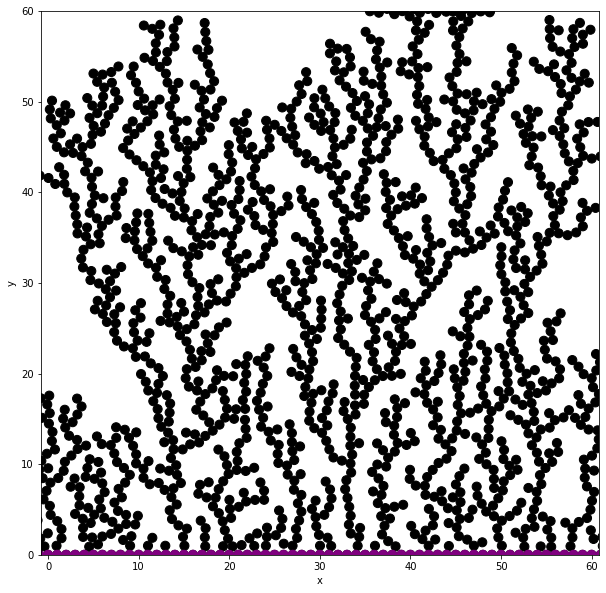

In [ ]:
fig,ax = plt.subplots(1,1)
for i in range(len(boundaryx)):
  circle = plt.Circle((boundaryx[i],boundaryy[i]),radius=0.5,color='k')
  ax.add_patch(circle)
for i in range(len(iboundaryx)):
  circle = plt.Circle((iboundaryx[i],iboundaryy[i]),radius=0.5,color='purple')
  ax.add_patch(circle)
ax.axis('equal')
ax.set(xlabel='x',xlim=(0,60),ylabel='y',ylim=(0,60))
fig.set_size_inches(10, 10)
plt.show()

**(new i) How does your pattern compare to those in the DLA link above? How do you expect the pattern to change as you vary the  strength of the randomness compared to attraction/bias?  What do you expect the output to look like if fluctuations and attraction are comparable? What about if the strength of the attraction is much larger than the fluctuations? What about when the attraction is much smaller than the fluctuations?** 

The pattern visible in my code is relatively similar to the ones presented in the DLA link above. Both examples share vertical, branching structures. If we increase the bias relative to the random fluctuation, I expect that there will be less branching and more condensed packing of the spheres. Alternatively, if we decrease attraction there will be more branching and open space in the structures. If fluctuations and attraction are comparable, its possible that the structuires could form branches at approximately 45 degree angles. 

In [ ]:
#Random walk for a number of particles randomly distributed over a smaller initial area

def randomWalkCondensed(nSteps, H, bias, stepsize,N):

  
  particles=np.zeros([nSteps,2,N])
  particles[0,1,:]=H
  for i in range(N):
    particles[0,0,i]=H/2+(H/2)*(nprnd.rand(1)-0.5)

  #print('assigned random starting pos')
  #print(particles[0,0,:])
  forcebreak=False

  boundaryx=np.arange(-H/3,H+H/3,1)
  boundaryy=np.zeros(len(boundaryx))
  iboundaryx=boundaryx
  iboundaryy=boundaryy

  m = stepsize


  for ii in range(N):
    #print('next particle')
    for i in range(1,nSteps):
      ang = 2*np.pi*(nprnd.rand(1)-0.5) #uniformly distributed angles between -pi and +pi

      #update position of particle
      particles[i,0,ii] = particles[i-1,0,ii] + m*np.cos(ang)
      particles[i,1,ii] = particles[i-1,1,ii] + m*np.sin(ang) - bias

      checkArray=np.sqrt((particles[i,0,ii]-boundaryx[:])**2+(particles[i,1,ii]-boundaryy[:])**2)

      #check distance against all boundary particles
      if np.any(checkArray < 1):
        
        #print('stopped particle')
        index=np.where(checkArray<1)
        #print(index)

        d=checkArray[index][0]
        phi=np.arctan2((boundaryy[index]-particles[i,1,ii]),(boundaryx[index]-particles[i,0,ii]))
        xc=(d-1)*np.cos(phi)
        yc=(d-1)*np.sin(phi)

        #print(xc)

        particles[i,0,ii]=particles[i,0,ii]+xc[0]
        particles[i,1,ii]=particles[i,1,ii]+yc[0]


        #if distance is less than one, add particle position to boundary particle list
        boundaryx=np.append(boundaryx,particles[i,0,ii])
        boundaryy=np.append(boundaryy,particles[i,1,ii])

        particles[i+1:nSteps,0,ii]=particles[i,0,ii]
        particles[i+1:nSteps,1,ii]=particles[i,1,ii]
        break

  return particles,boundaryx,boundaryy,iboundaryx,iboundaryy

**(new j) Run your code to vary the relative strength of the attraction to the fluctuations (keeping in mind your answers for parameter considerations questions in part (f)), plot the results for the three cases discussed in the previous part, and discuss the output relative to your expectations.**


In [ ]:
N=500
#Stronger bias than fluctation
particles1,boundaryx1,boundaryy1,iboundaryx1,iboundaryy1=randomWalkCondensed(1000, 60, 0.8, 0.5, N)
#Equal bias and fluctuation
particles2,boundaryx2,boundaryy2,iboundaryx2,iboundaryy2=randomWalkCondensed(10000, 60, 0.5, 0.5, N)
#Less bias than fluctuation
particles3,boundaryx3,boundaryy3,iboundaryx3,iboundaryy3=randomWalkCondensed(10000, 60, 0.2, 0.5, N)

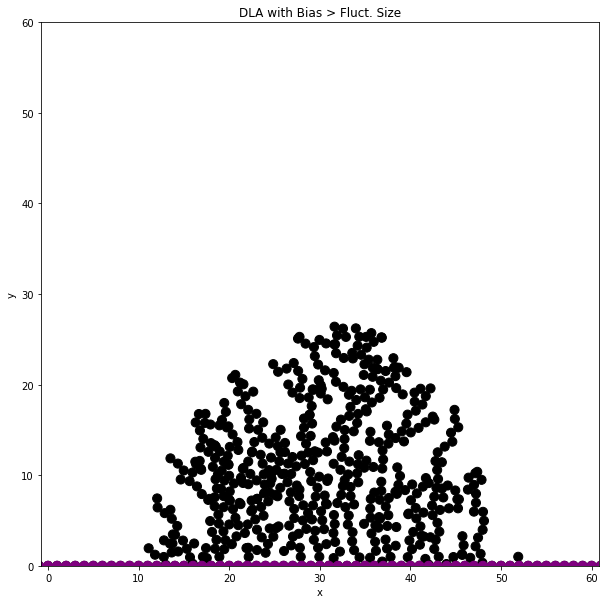

In [ ]:
fig,ax1 = plt.subplots(1,1)
for i in range(len(boundaryx1)):
  circle = plt.Circle((boundaryx1[i],boundaryy1[i]),radius=0.5,color='k')
  ax1.add_patch(circle)
for i in range(len(iboundaryx1)):
  circle = plt.Circle((iboundaryx1[i],iboundaryy1[i]),radius=0.5,color='purple')
  ax1.add_patch(circle)
ax1.axis('equal')
ax1.set(xlabel='x',xlim=(0,60),ylabel='y',ylim=(0,60))
fig.set_size_inches(10, 10)
plt.title('DLA with Bias > Fluct. Size')
plt.show()

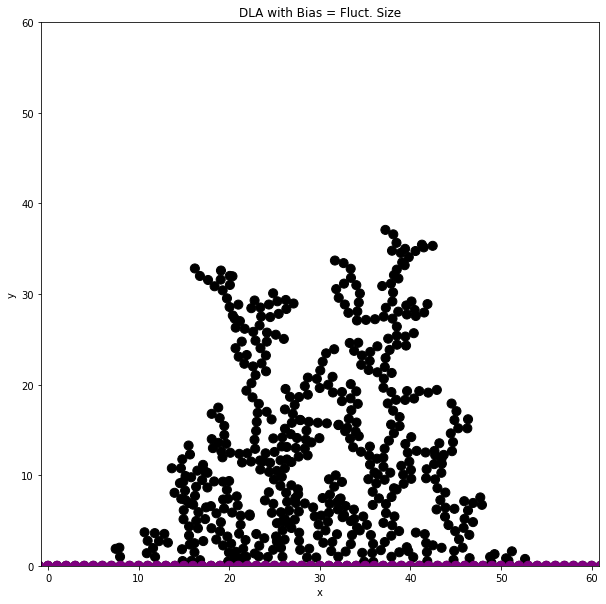

In [ ]:
fig,ax1 = plt.subplots(1,1)
for i in range(len(boundaryx2)):
  circle = plt.Circle((boundaryx2[i],boundaryy2[i]),radius=0.5,color='k')
  ax1.add_patch(circle)
for i in range(len(iboundaryx2)):
  circle = plt.Circle((iboundaryx2[i],iboundaryy2[i]),radius=0.5,color='purple')
  ax1.add_patch(circle)
ax1.axis('equal')
ax1.set(xlabel='x',xlim=(0,60),ylabel='y',ylim=(0,60))
fig.set_size_inches(10, 10)
plt.title('DLA with Bias = Fluct. Size')
plt.show()

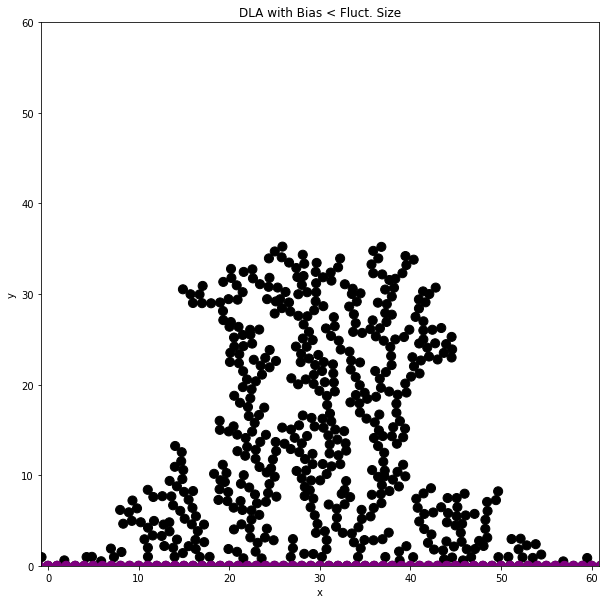

In [ ]:
fig,ax1 = plt.subplots(1,1)
for i in range(len(boundaryx3)):
  circle = plt.Circle((boundaryx3[i],boundaryy3[i]),radius=0.5,color='k')
  ax1.add_patch(circle)
for i in range(len(iboundaryx3)):
  circle = plt.Circle((iboundaryx3[i],iboundaryy3[i]),radius=0.5,color='purple')
  ax1.add_patch(circle)
ax1.axis('equal')
ax1.set(xlabel='x',xlim=(0,60),ylabel='y',ylim=(0,60))
fig.set_size_inches(10, 10)
plt.title('DLA with Bias < Fluct. Size')
plt.show()

My predictions for the effect of bias relative to fluctuation were generally accurate. A large bias/fluctuation ratio causes collapsed, dense structures, while a low bias/fluctuation ratio leads to open, tall, branching structures. However, my prediction for 45 degree branch angles at a bias/fluctuation ratio of 1 was incorrect. Instead, it seems that the structure density is generally between that of the low and high bias ratio structures and the branch angles are random. 